# Example: REV analysis for Euler density

This example demonstrates how to perform REV analysis for Euler density, calculated for pore phase of
binary image. 

We obtain Euler density $\chi_n$ by the normalization of Euler number $\chi$ over the subcube volume (total number of voxels). The metric χ represents the topological properties of considered voxel domain and can be calculated as [1] 

$\chi$ = #vertices − #edges + #faces − #volumes,      

where # means ’number of’.

[1] Vogel, H. J., Weller, U., & Schlüter, S. (2010). Quantification of soil structure based on Minkowski functions. Computers & Geosciences, 36(10), 1236-1245.

In [1]:
from julia.api import Julia
jl = Julia(compiled_modules=False)
from revanalyzer import REVAnalyzer
from revanalyzer.metrics import EulerDensityI

In [2]:
#input data for analyzer initialization and subcube selection
image = 'ceramic300'
size = 300
cut_step = 50
sREV_max_size = 200

In [3]:
#initialization of metric and analyzer.

show_time = True #default: False. Added to monitor time cost for large images.
metric = EulerDensityI(show_time) 

analyzer = REVAnalyzer(metric, image, size, cut_step, sREV_max_size)

In [4]:
#generate metric data for all the subcubes
analyzer.generate()

cut  cut0_50_ceramic300 , run time: 
--- 1.6526741981506348 seconds ---
cut  cut1_50_ceramic300 , run time: 
--- 0.12890243530273438 seconds ---
cut  cut2_50_ceramic300 , run time: 
--- 0.13567471504211426 seconds ---
cut  cut3_50_ceramic300 , run time: 
--- 0.12640023231506348 seconds ---
cut  cut4_50_ceramic300 , run time: 
--- 0.12674188613891602 seconds ---
cut  cut5_50_ceramic300 , run time: 
--- 0.12948250770568848 seconds ---
cut  cut6_50_ceramic300 , run time: 
--- 0.12616300582885742 seconds ---
cut  cut7_50_ceramic300 , run time: 
--- 0.12665820121765137 seconds ---
cut  cut8_50_ceramic300 , run time: 
--- 0.1347970962524414 seconds ---
cut  cut0_100_ceramic300 , run time: 
--- 0.5164446830749512 seconds ---
cut  cut1_100_ceramic300 , run time: 
--- 0.526700496673584 seconds ---
cut  cut2_100_ceramic300 , run time: 
--- 0.5080878734588623 seconds ---
cut  cut3_100_ceramic300 , run time: 
--- 0.515394926071167 seconds ---
cut  cut4_100_ceramic300 , run time: 
--- 0.50993585586

In [5]:
#read the metric value from the specific subcube:
cut_size = 150
cut_id = 5
value = analyzer.read(cut_size, cut_id)
print(value)

-0.000112


In [7]:
#fix thresholds and analyze generated data
dREV_threshold = 0.2
sREV_threshold = 0.2
analyzer.analyze(dREV_threshold, sREV_threshold)

In [9]:
#get mean, std and normed std values for different cut sizes
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std)

#get sREV and dREV sizes
print(analyzer.sREV_size_1)
print(analyzer.dREV_size_1)
print(analyzer.dREV_size_2)


{300: -0.00010092592592592593, 50: -3.555555555555556e-05, 100: -8.555555555555556e-05, 150: -9.303703703703704e-05, 200: -9.768055555555555e-05, 250: -9.9392e-05}
{50: 3.180185567999701e-05, 100: 1.5656813292274256e-05, 150: 1.11705406543002e-05, 200: 6.530407271817161e-06}
{50: 0.8944271909999157, 100: 0.183001713805803, 150: 0.12006552454860885, 200: 0.06685473106367633}
100
100
100


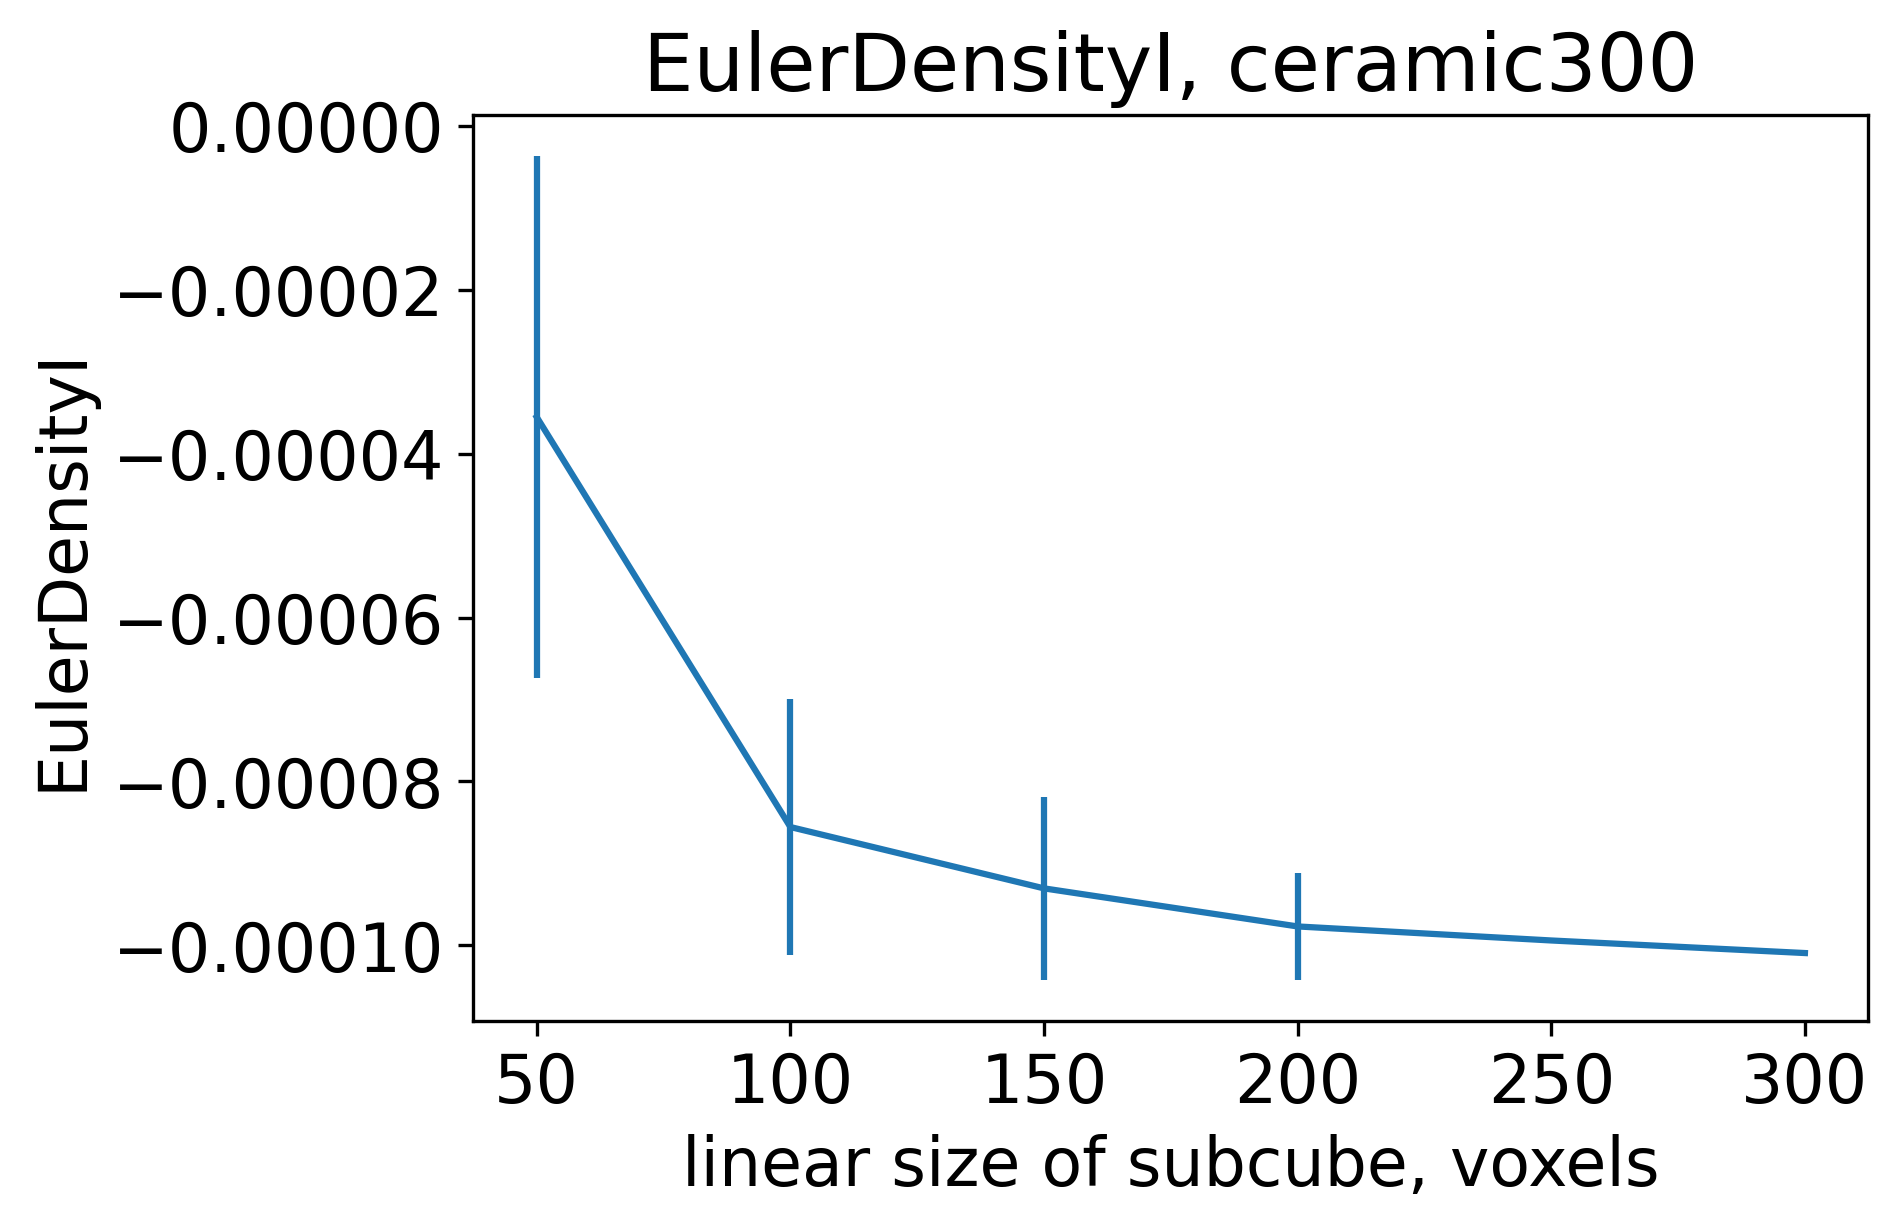

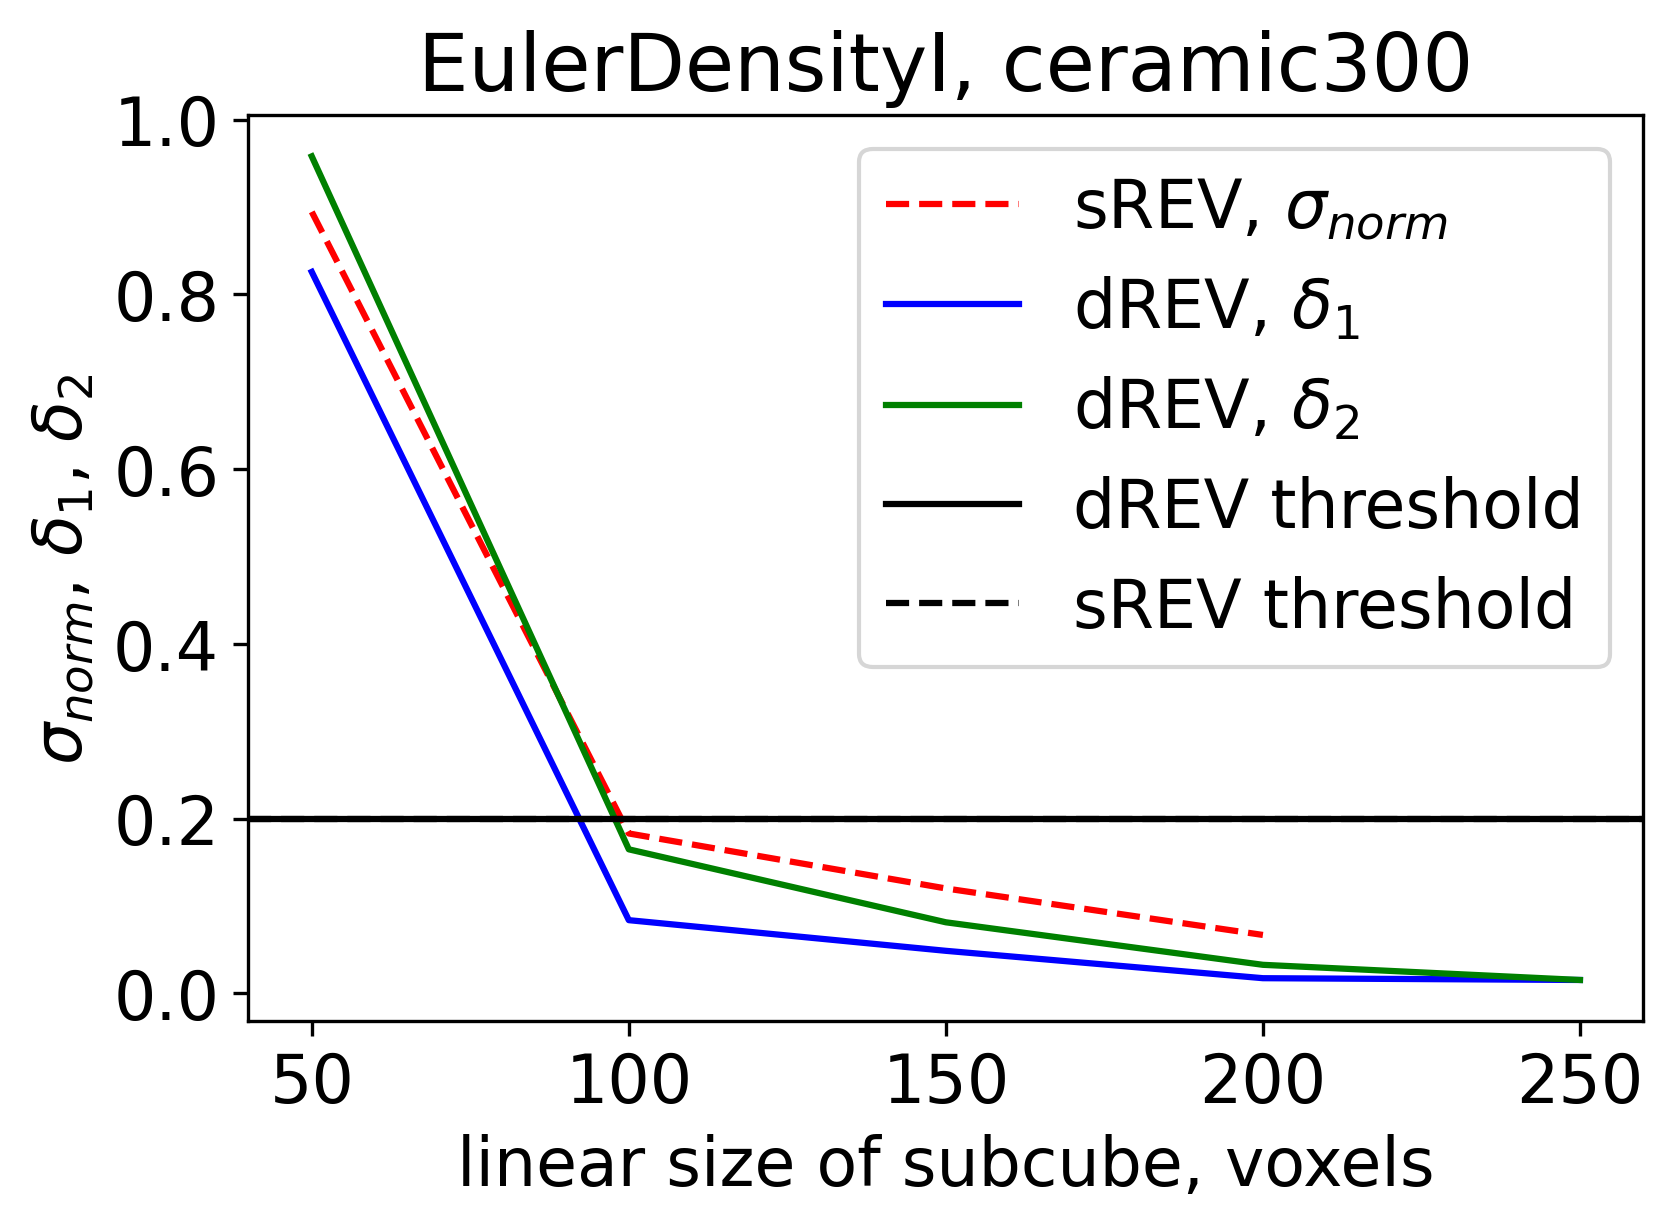

In [10]:
#show_results
analyzer.show_results()